Práctica 9: análisis de asociación

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import missingno as msno

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
peliculas=[["Lilo y Stitch", "Mulan", "Avengers", "Rapidos y Furiosos", "Una esposa de mentira", "Spiderman", 
          "Lluvia de hamburguesas",  "Triple Frontera"],
           [ "Mulan", "Avengers", "Rapidos y Furiosos",  "Spiderman", 
         "Buscando a nemo", "Harry Potter", "Triple Frontera"],
           ["Lilo y Stitch", "Mulan", "Avengers", "Rapidos y Furiosos", "Una esposa de mentira", "Spiderman", 
         "Buscando a nemo", "Lluvia de hamburguesas", "Harry Potter", "Triple Frontera"],
           ["Lilo y Stitch", "Mulan", "Avengers"],
           ["Lilo y Stitch", "Lluvia de hamburguesas", "Harry Potter", "Triple Frontera"],
           ["Lilo y Stitch", "Mulan", "Avengers", "Rapidos y Furiosos","Spiderman", 
         "Buscando a nemo", "Lluvia de hamburguesas", "Harry Potter"],
           ["Harry Potter", "Triple Frontera"],
           ["Lilo y Stitch", "Mulan", "Avengers", "Rapidos y Furiosos"],
           ["Lilo y Stitch", "Mulan", "Avengers", "Una esposa de mentira", 
         "Buscando a nemo", "Harry Potter", "Triple Frontera"]]
peliculas

[['Lilo y Stitch',
  'Mulan',
  'Avengers',
  'Rapidos y Furiosos',
  'Una esposa de mentira',
  'Spiderman',
  'Lluvia de hamburguesas',
  'Triple Frontera'],
 ['Mulan',
  'Avengers',
  'Rapidos y Furiosos',
  'Spiderman',
  'Buscando a nemo',
  'Harry Potter',
  'Triple Frontera'],
 ['Lilo y Stitch',
  'Mulan',
  'Avengers',
  'Rapidos y Furiosos',
  'Una esposa de mentira',
  'Spiderman',
  'Buscando a nemo',
  'Lluvia de hamburguesas',
  'Harry Potter',
  'Triple Frontera'],
 ['Lilo y Stitch', 'Mulan', 'Avengers'],
 ['Lilo y Stitch',
  'Lluvia de hamburguesas',
  'Harry Potter',
  'Triple Frontera'],
 ['Lilo y Stitch',
  'Mulan',
  'Avengers',
  'Rapidos y Furiosos',
  'Spiderman',
  'Buscando a nemo',
  'Lluvia de hamburguesas',
  'Harry Potter'],
 ['Harry Potter', 'Triple Frontera'],
 ['Lilo y Stitch', 'Mulan', 'Avengers', 'Rapidos y Furiosos'],
 ['Lilo y Stitch',
  'Mulan',
  'Avengers',
  'Una esposa de mentira',
  'Buscando a nemo',
  'Harry Potter',
  'Triple Frontera']]

In [3]:
peliculas[0]

['Lilo y Stitch',
 'Mulan',
 'Avengers',
 'Rapidos y Furiosos',
 'Una esposa de mentira',
 'Spiderman',
 'Lluvia de hamburguesas',
 'Triple Frontera']

In [4]:
df = pd.DataFrame.from_records(peliculas)
df


,0,1,2,3,4,5,6,7,8,9
0,Lilo y Stitch,Mulan,Avengers,Rapidos y Furiosos,Una esposa de mentira,Spiderman,Lluvia de hamburguesas,Triple Frontera,None,None
1,Mulan,Avengers,Rapidos y Furiosos,Spiderman,Buscando a nemo,Harry Potter,Triple Frontera,None,None,None
2,Lilo y Stitch,Mulan,Avengers,Rapidos y Furiosos,Una esposa de mentira,Spiderman,Buscando a nemo,Lluvia de hamburguesas,Harry Potter,Triple Frontera
3,Lilo y Stitch,Mulan,Avengers,None,None,None,None,None,None,None
4,Lilo y Stitch,Lluvia de hamburguesas,Harry Potter,Triple Frontera,None,None,None,None,None,None
5,Lilo y Stitch,Mulan,Avengers,Rapidos y Furiosos,Spiderman,Buscando a nemo,Lluvia de hamburguesas,Harry Potter,None,None
6,Harry Potter,Triple Frontera,None,None,None,None,None,None,None,None
7,Lilo y Stitch,Mulan,Avengers,Rapidos y Furiosos,None,None,None,None,None,None
8,Lilo y Stitch,Mulan,Avengers,Una esposa de mentira,Buscando a nemo,Harry Potter,Triple Frontera,None,None,None


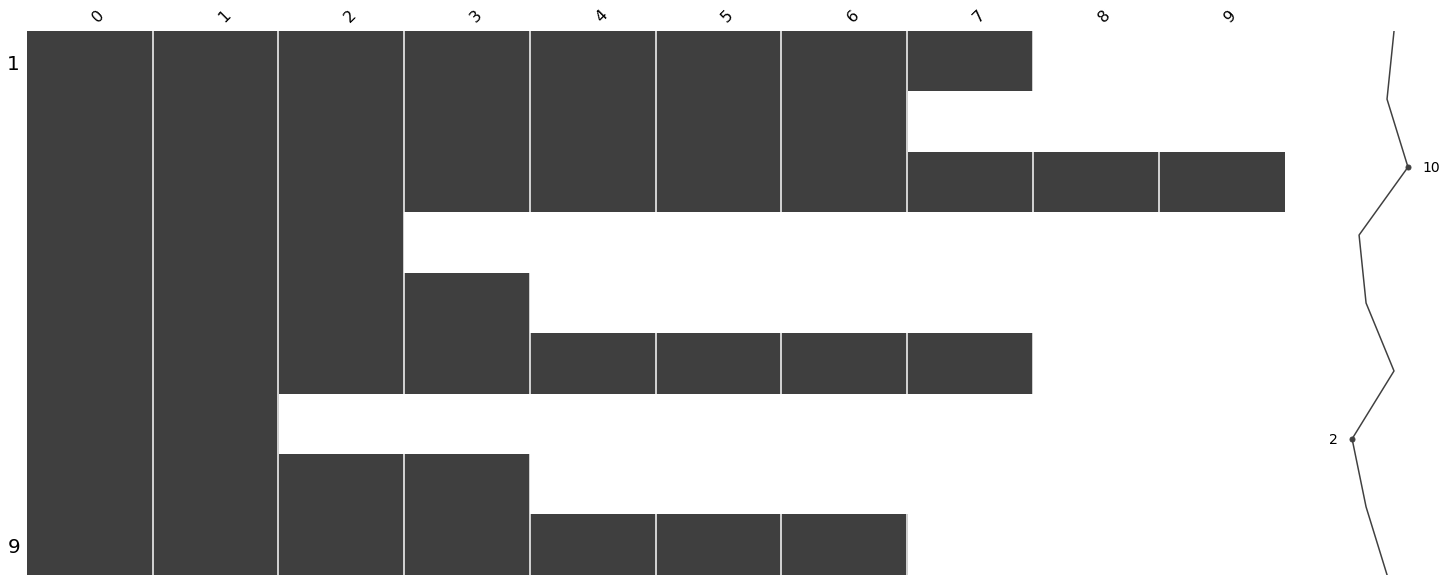

In [5]:
msno.matrix(df)

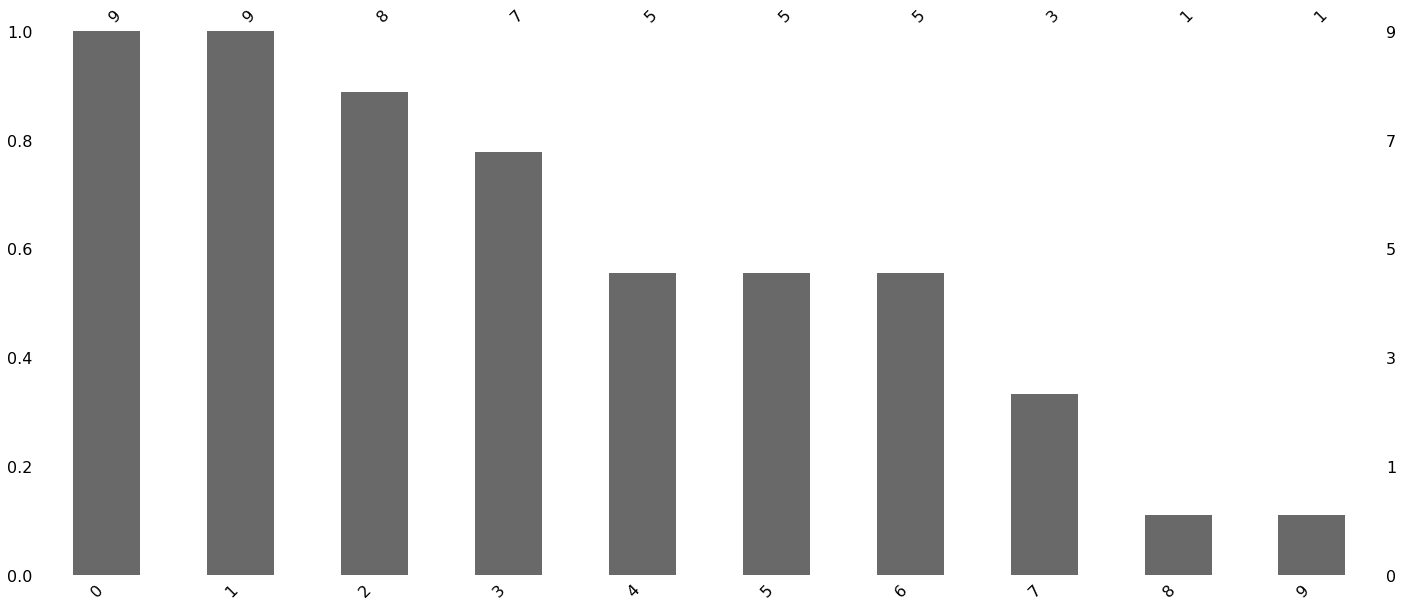

In [6]:
msno.bar(df)

In [7]:
items =["Lilo y Stitch", "Mulan", "Avengers", "Rapidos y Furiosos", "Una esposa de mentira", "Spiderman", 
         "Buscando a nemo", "Lluvia de hamburguesas", "Harry Potter", "Triple Frontera"]
items

['Lilo y Stitch',
 'Mulan',
 'Avengers',
 'Rapidos y Furiosos',
 'Una esposa de mentira',
 'Spiderman',
 'Buscando a nemo',
 'Lluvia de hamburguesas',
 'Harry Potter',
 'Triple Frontera']

In [17]:
encoded_vals = []

for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
    ohe_df = pd.DataFrame(encoded_vals)
ohe_df.head()


,Harry Potter,Buscando a nemo,Triple Frontera,Lluvia de hamburguesas,Avengers,Lilo y Stitch,Mulan,Rapidos y Furiosos,Una esposa de mentira,Spiderman
0,0,0,1,1,1,1,1,1,1,1
1,1,1,1,0,1,0,1,1,0,1
2,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,1,1,1,0,0,0
4,1,0,1,1,0,1,0,0,0,0


In [18]:

freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True)
freq_items.head()

,support,itemsets
0,0.666667,(Harry Potter)
1,0.444444,(Buscando a nemo)
2,0.666667,(Triple Frontera)
3,0.444444,(Lluvia de hamburguesas)
4,0.777778,(Avengers)


In [19]:
freq_items.itemsets.unique()

array([frozenset({'Harry Potter'}), frozenset({'Buscando a nemo'}),
       frozenset({'Triple Frontera'}),
       frozenset({'Lluvia de hamburguesas'}), frozenset({'Avengers'}),
       frozenset({'Lilo y Stitch'}), frozenset({'Mulan'}),
       frozenset({'Rapidos y Furiosos'}),
       frozenset({'Una esposa de mentira'}), frozenset({'Spiderman'}),
       frozenset({'Harry Potter', 'Buscando a nemo'}),
       frozenset({'Harry Potter', 'Triple Frontera'}),
       frozenset({'Harry Potter', 'Lluvia de hamburguesas'}),
       frozenset({'Harry Potter', 'Avengers'}),
       frozenset({'Harry Potter', 'Lilo y Stitch'}),
       frozenset({'Harry Potter', 'Mulan'}),
       frozenset({'Harry Potter', 'Rapidos y Furiosos'}),
       frozenset({'Harry Potter', 'Una esposa de mentira'}),
       frozenset({'Harry Potter', 'Spiderman'}),
       frozenset({'Buscando a nemo', 'Triple Frontera'}),
       frozenset({'Buscando a nemo', 'Lluvia de hamburguesas'}),
       frozenset({'Buscando a nemo', 'Ave

In [20]:
rules = association_rules(freq_items, min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Harry Potter),(Buscando a nemo),0.666667,0.444444,0.444444,0.666667,1.500,0.148148,1.666667
1,(Buscando a nemo),(Harry Potter),0.444444,0.666667,0.444444,1.000000,1.500,0.148148,inf
2,(Harry Potter),(Triple Frontera),0.666667,0.666667,0.555556,0.833333,1.250,0.111111,2.000000
3,(Triple Frontera),(Harry Potter),0.666667,0.666667,0.555556,0.833333,1.250,0.111111,2.000000
4,(Lluvia de hamburguesas),(Harry Potter),0.444444,0.666667,0.333333,0.750000,1.125,0.037037,1.333333
...,...,...,...,...,...,...,...,...,...
9864,"(Spiderman, Lilo y Stitch)","(Triple Frontera, Lluvia de hamburguesas, Aven...",0.333333,0.222222,0.222222,0.666667,3.000,0.148148,2.333333
9865,"(Mulan, Una esposa de mentira)","(Triple Frontera, Lluvia de hamburguesas, Aven...",0.333333,0.222222,0.222222,0.666667,3.000,0.148148,2.333333
9866,"(Una esposa de mentira, Rapidos y Furiosos)","(Triple Frontera, Lluvia de hamburguesas, Aven...",0.222222,0.222222,0.222222,1.000000,4.500,0.172840,inf
9867,"(Una esposa de mentira, Spiderman)","(Triple Frontera, Lluvia de hamburguesas, Aven...",0.222222,0.222222,0.222222,1.000000,4.500,0.172840,inf
